In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_CONTAINER = ""

In [9]:
def load_csv_data(file_name, data_container=DATA_CONTAINER):
    csv_path = os.path.join(data_container, file_name)
    return pd.read_csv(csv_path)

def max_latency(core1_max, core2_max, core3_max, core4_max):
    i1_max = 0
    i2_max = 0
    i3_max = 0
    i4_max = 0
    for i in range(len(core1_max)-1,0,-1):
        if(core1_max[i] != 0):
            i1_max = i
            break
    for i in range(len(core2_max)-1,0,-1):
        if(core2_max[i] != 0):
            i2_max = i
            break
    for i in range(len(core3_max)-1,0,-1):
        if(core3_max[i] != 0):
            i3_max = i
            break
    for i in range(len(core4_max)-1,0,-1):
        if(core4_max[i] != 0):
            i4_max = i
            break
    max_latency = np.max([i1_max, i2_max, i3_max, i4_max])
    return max_latency

In [14]:
#model = "model_b"
model = "model_b+"

In [15]:
latency_rt = load_csv_data(file_name='histogram_xenokernel_' + model + '.csv',data_container='data/4.14.52/')
latency_rt = latency_rt.set_index('time')
max_latency_rt = max_latency(latency_rt.core1.values,latency_rt.core2.values,latency_rt.core3.values,latency_rt.core4.values)

In [12]:
latency_std = load_csv_data(file_name='histogram_stdkernel_' + model + '.csv',data_container='data/latency')
latency_std = latency_std.set_index('time')
max_latency_std = max_latency(latency_std.core1.values,latency_std.core2.values,latency_std.core3.values,latency_std.core4.values)

In [13]:
latency_rt_docker = load_csv_data(file_name='histogram_rtkernel_docker.csv')
latency_rt_docker = latency_rt_docker.set_index('time')
max_latency_rt_docker = max_latency(latency_rt_docker.core1.values,latency_rt_docker.core2.values,latency_rt_docker.core3.values,latency_rt_docker.core4.values)

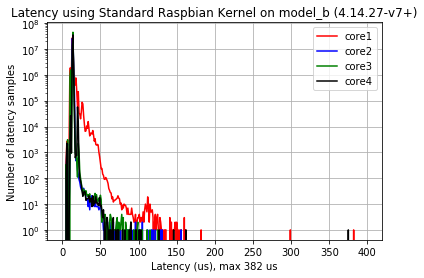

In [18]:
mnplt = 0
mxplt = 400
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core1[mnplt:mxplt], 'r', label='core1')
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core2[mnplt:mxplt], 'b', label='core2')
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core3[mnplt:mxplt], 'g', label='core3')
plt.semilogy(latency_std.index[mnplt:mxplt], latency_std.core4[mnplt:mxplt], 'k', label='core4')
plt.title('Latency using Standard Raspbian Kernel on ' + model + ' (4.14.27-v7+)')
plt.ylabel('Number of latency samples')
plt.xlabel('Latency (us), max %i us' % max_latency_std)
plt.legend()
plt.grid(True)

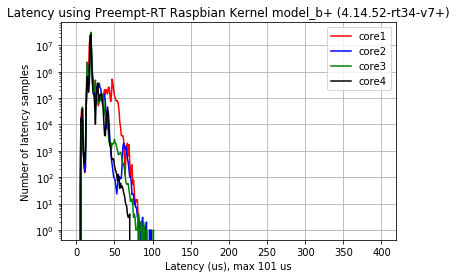

In [17]:
mnplt = 0
mxplt = 400
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core1[mnplt:mxplt], 'r', label='core1')
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core2[mnplt:mxplt], 'b', label='core2')
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core3[mnplt:mxplt], 'g', label='core3')
plt.semilogy(latency_rt.index[mnplt:mxplt], latency_rt.core4[mnplt:mxplt], 'k', label='core4')
#plt.title('Latency using Preempt-RT Raspbian Kernel ' + model + ' (4.14.52-rt34-v7+)')
plt.title('Latency using Xenomai Patched Kernel ' + model + ' (4.14.37-v7+)')
plt.ylabel('Number of latency samples')
plt.xlabel('Latency (us), max %i us' % max_latency_rt)
plt.legend()
plt.grid(True)

In [20]:
#mnplt = 0
#mxplt = 400
#plt.semilogy(latency_rt_docker.index[mnplt:mxplt], latency_rt_docker.core1[mnplt:mxplt], 'r', label='core1')
#plt.semilogy(latency_rt_docker.index[mnplt:mxplt], latency_rt_docker.core2[mnplt:mxplt], 'b', label='core2')
#plt.semilogy(latency_rt_docker.index[mnplt:mxplt], latency_rt_docker.core3[mnplt:mxplt], 'g', label='core3')
#plt.semilogy(latency_rt_docker.index[mnplt:mxplt], latency_rt_docker.core4[mnplt:mxplt], 'k', label='core4')
#plt.title('Latency using Docker on RT-Preempt Raspbian Kernel (4.14.21-rt17-v7+)')
#plt.ylabel('Number of latency samples')
#plt.xlabel('Latency (us), max %i us' % max_latency_rt_docker)
#plt.legend()
#plt.grid(True)

In [10]:
latency_std.sort_values('core1', ascending=False, inplace=False, kind='quicksort').head()

,core1,core2,core3,core4
time,,,,
13,27009553,25428764,1719841,13587554
14,13505516,22108741,44890727,35380040
11,1847548,36094,1554183,26420
10,1817965,697,800673,1076
15,1709953,2163968,997448,886626


In [11]:
latency_rt.sort_values('core1', ascending=False, inplace=False, kind='quicksort').head()

,core1,core2,core3,core4
time,,,,
18,7902259,19388560,6138428,1535938
19,7349745,3574712,11559149,16301216
15,6562232,5577351,7066447,3517822
43,1699142,53670,54200,44115
14,1522800,1796940,1333736,2121763


In [13]:
#latency_rt_docker.sort_values('core1', ascending=False, inplace=False, kind='quicksort').head()